# Transformação de Perspectiva com OpenCV
Este notebook realiza uma transformação de perspectiva em uma imagem fornecida. Basta definir o nome da imagem no código.


In [ ]:
!pip --quiet install opencv-python-headless matplotlib

import cv2
import numpy as np
from matplotlib import pyplot as plt

def transformar_perspectiva():
    caminho = 'imagem.jpeg'
    img = cv2.imread(caminho)

    if img is None:
        print("Erro ao carregar a imagem. Verifique o nome e o caminho do arquivo.")
        return

    img = cv2.resize(img, (800, 1000))
    original = img.copy()

    cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cinza = cv2.GaussianBlur(cinza, (5, 5), 0)

    bordas = cv2.Canny(cinza, 50, 150)
    plt.imshow(bordas, cmap='gray')
    plt.title("Bordas detectadas")
    plt.axis('off')
    plt.show()

    contornos, _ = cv2.findContours(bordas.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:5]

    for cnt in contornos:
        perimetro = cv2.arcLength(cnt, True)
        aprox = cv2.approxPolyDP(cnt, 0.02 * perimetro, True)
        if len(aprox) == 4:
            cantos = aprox.reshape(4, 2)
            break
    else:
        print("Não foi possível encontrar 4 cantos.")
        return

    temp = original.copy()
    cv2.drawContours(temp, [aprox], -1, (0, 0, 255), 3)
    plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
    plt.title("Contorno Detectado")
    plt.axis('off')
    plt.show()

    cantos = sorted(cantos, key=lambda x: x[0])
    esquerda = sorted(cantos[:2], key=lambda x: x[1])
    direita = sorted(cantos[2:], key=lambda x: x[1])
    cantos_ordenados = np.array([esquerda[0], direita[0], direita[1], esquerda[1]])

    largura, altura = 800, 1000
    destino = np.array([[0,0], [largura,0], [largura,altura], [0,altura]], dtype=np.float32)

    M = cv2.getPerspectiveTransform(cantos_ordenados.astype(np.float32), destino)
    resultado = cv2.warpPerspective(original, M, (largura, altura))

    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Imagem Original")
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
    plt.title("Imagem Transformada")
    plt.axis('off')

    plt.show()


## executando

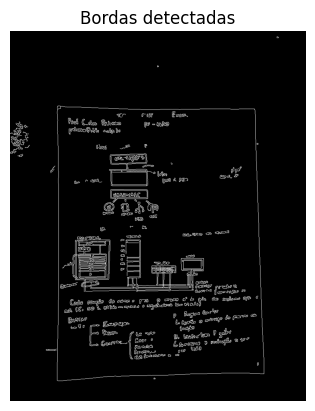

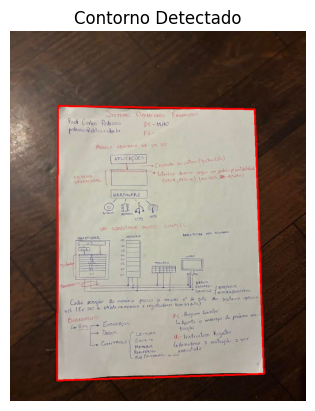

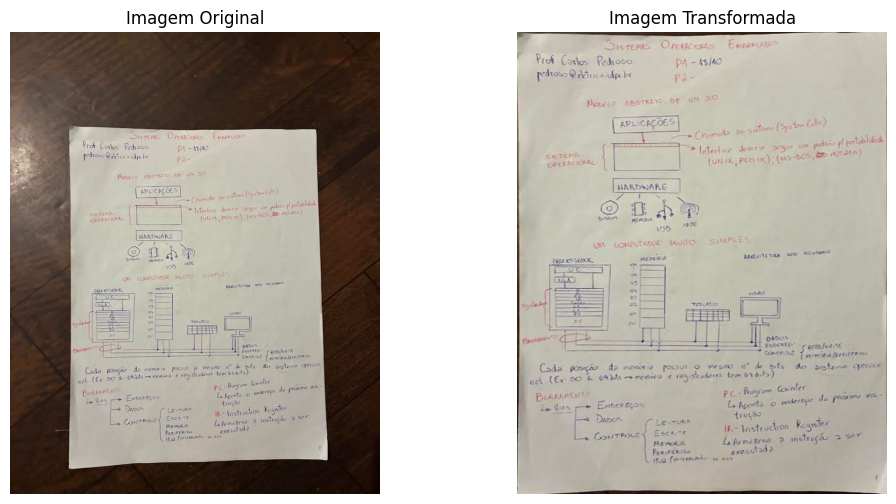

In [5]:
transformar_perspectiva()
